<a href="https://colab.research.google.com/github/khbae/trading/blob/master/06_ARCH_and_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive Conditional Heteroskedastic Models - ARCH(q)

* https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity
* http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

**Asset Volatility: conditional standard deviation of asset returns**

Why is volatility important?
* Option Pricing, e.g. Black-Sholes-Merton Formula
* Risk management, e.g. Value at Risk (VaR)
* Asset allocation, e.g. minimum-variance portfolio

Volatility Calculation
* Realized volatility of daily log returns
* Use intraday high frequency log returns
* Use daily high and low prices: daily high - daily low prices
* Implied volatility of options: e.g. VIX
* Econometric modeling

### ARCH(q) model
The variance of time series at time t is conditional on the past variance in previous periods.

$$ \varepsilon_{t} = \sigma_{t} z_{t} $$
, where $z_t$ is a white noise. The series $\sigma_t^2$  is modelled by

$$ \sigma_{t}^{2} = \omega + \sum_{i=1}^{q} \alpha_i \varepsilon_{t−i}^{2} $$

Distribution of $z_t$
* standard normal
* standardized Student t
* Generalized error distribution (GED)

In [0]:
!pip install Cython
!pip install arch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

### ARCH(1) model

$$ \sigma_{t}^{2} = \omega + \alpha_1 \varepsilon_{t−1}^{2} $$
$$ \sigma_{t} = \sqrt{\omega + \alpha_1 \varepsilon_{t−1}^{2}} $$
$$ \varepsilon_{t} = \sigma_{t} z_{t} $$

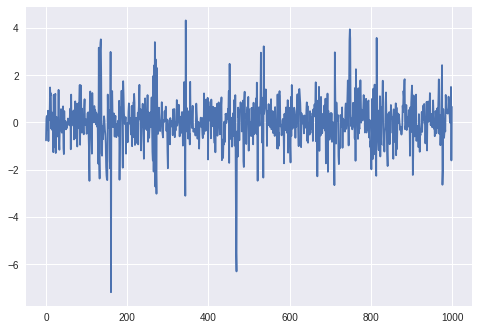

In [0]:
# arch model
zt = np.random.normal(size=1000)
epsilon = np.zeros(1000)
omega = 0.3
alpha1 = 0.7

for t in range(1000):
  sigma = np.sqrt(omega + alpha1 * epsilon[t-1] **2 )
  epsilon[t] = sigma * zt[t]

plt.plot(epsilon)

### ARCH Fit
* http://arch.readthedocs.io/en/latest/univariate/introduction.html

In [0]:
# ARCH fit
ARCHfit = arch_model(y=epsilon,vol='Arch').fit()
print(ARCHfit.summary())


Iteration:      1,   Func. Count:      5,   Neg. LLF: 1152.3134400722543
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1152.1662031663568
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1151.6062917453114
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1150.6525275008544
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1150.6452446687715
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1150.6325118213447
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1150.6324814205925
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1150.6324814206084
            Iterations: 7
            Function evaluations: 43
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log

## ARCH model's advantages and weaknesses
### Advantages
* Simplicity
* Generates volatility clustering
* Heavy tails or high kurtosis

### Weakness
* Symmetric between positive & negative prior returns
* Restrictive 
* Provide no explanation
* Not sufficiently adaptive in prediction




## Generalized Autoregressive Conditional Heteroskedastic Models - GARCH(p,q)

GARCH(p, q) is an ARMA model that is applied to the variance of a time serie. 

* https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity

The variance of time series at time t is conditional on the past variance in previous periods.

$$ \varepsilon_{t} = \sigma_{t} z_{t} $$
, where $z_t$ is a white noise. The series $\sigma_t^2$  is modelled by

$$ \sigma_{t}^{2} = \omega + \sum_{i=1}^{q} \alpha_i \varepsilon_{t−i}^{2} + \sum_{i=1}^{p}\beta_i \sigma_{t−i}^{2} $$

This is an ARMA model for $\sigma_{t}^2$

## GARCH (1,1) model

$$ \sigma_{t}^{2} = \omega + \alpha_1 \varepsilon_{t−1}^{2} + \beta_1 \sigma_{t−1}^{2} $$

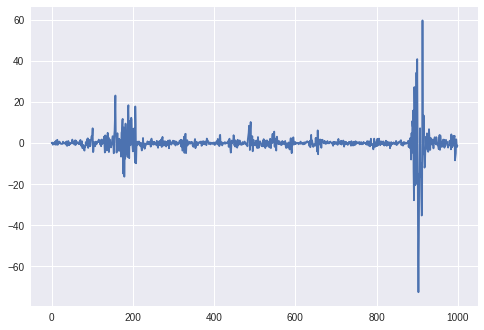

In [0]:
# garch model

zt = np.random.normal(size=1000)
gepsilon = np.zeros(1000)
sigma = np.zeros(1000)

omega = 0.1
alpha1 = 0.8
beta1 = 0.4

for t in range(1000):
  sigma[t] = np.sqrt(omega + alpha1 * gepsilon[t-1] **2 + beta1 * sigma[t-1]**2 )
  gepsilon[t] = sigma[t] * zt[t]

plt.plot(gepsilon)

In [0]:
# GARCH model fit
GARCHfit = arch_model(y=gepsilon,vol='Garch').fit()
print(GARCHfit.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2096.782325887705
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2088.5407526934587
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1991.9467452811803
Iteration:      4,   Func. Count:     28,   Neg. LLF: 1941.560814715871
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1887.725481715503
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1873.6417200938415
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1849.1880383504363
Iteration:      8,   Func. Count:     56,   Neg. LLF: 1830.7707602044738
Iteration:      9,   Func. Count:     63,   Neg. LLF: 1816.8428966488323
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1810.4793470983946
Iteration:     11,   Func. Count:     77,   Neg. LLF: 1806.0310010220724
Iteration:     12,   Func. Count:     84,   Neg. LLF: 1803.6050601979036
Iteration:     13,   Func. Count:     90,   Neg. LLF: 1801.4889964588288
Iteration:     14,   Func. Count:     96,   Neg. LLF: 

### GARCH Limitatons
* GARCH operates under stable market conditions.
* GARCH cannot explain irregular phenomena such as market crashes and subsequent rebounds.
* GARCH cannot model a structural change.
* GARCH models often fail to fully capture the fat tails observed in asset return series.

### Other Models
* IGARCH
* EGARCH
* MGARCH
* ...